In [275]:
import numpy as np
import pandas as pd
from math import *
import matplotlib.pyplot as plt

In [276]:
data_train = pd.read_csv('project2.csv')
data_train = data_train.sample(frac=1)  #to shuffle the training set
X = data_train.loc[:, data_train.columns != 'target']
y = data_train['target']

X_test=pd.read_csv('project2_test.csv')

In [277]:
# splitting into training and validation set
train_len = 270
X_train = X.iloc[:train_len]
y_train = y.iloc[:train_len]
X_val = X.iloc[train_len:]
y_val = y.iloc[train_len:]

In [290]:
# preprocess to standardize all values
mean = (X.mean(axis=0))
std = (X.std(axis=0))
X = (X-mean)/std

mean = (X_train.mean(axis=0))
std = (X_train.std(axis=0))
X_train = (X_train-mean)/std

mean = (X_val.mean(axis=0))
std = (X_val.std(axis=0))
X_val = (X_val-mean)/std

mean = (X_test.mean(axis=0))
std = (X_test.std(axis=0))
X_test = (X_test-mean)/std
X_test.head()
X_test['restecg'].values[:]=0 # since all values in this column are zero

In [300]:
def kNN_predict(k, X_train, y_train, X_test):
    y_test = []
    for x in X_test:
        distances = []
        for i in range(0, len(X_train)):
            distances.append((compute_distance(X_train[i], x), i))
        distances.sort(key=lambda a: a[0])

        target_count = [0, 0]
        for i in range(0, k):
            target_count[y_train[distances[i][1]]] += 1/distances[i][0]

        if(target_count[0] > target_count[1]):
            y_test.append(0)
        else:
            y_test.append(1)
    return y_test


In [301]:
def compute_distance(x1, x2):
    distance = 0
    for i in range(0, len(x1)):
        distance = distance+pow(x1[i]-x2[i], 2)
    return distance


In [302]:
def compute_error(y_test, prediction):
    error = 0
    for i in range(0, len(y_test)):
        if y_test[i] != prediction[i]:
            error += 1
    error /= len(y_test)
    return error*100


In [303]:
def plot_error(X_test, y_test):
    errors = []
    for k in range(1, 50):
        prediction = kNN_predict(
            k, X_train.values, y_train.values, X_test.values)
        errors.append(compute_error(y_test, prediction))
    plt.plot(range(1, 50), errors, '.-')


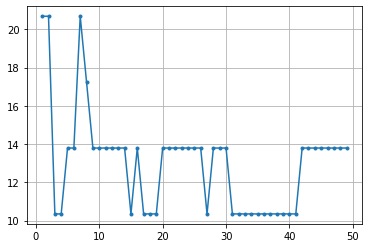

In [304]:
# choose best k based on error on validation set
plot_error(X_val,y_val.values)
plt.grid(True)

In [305]:
k = 15
prediction = kNN_predict(k, X.values, y.values, X_test.values)
print(prediction)


[1, 1, 0, 1]
